In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
sheet1 = pd.read_csv('Superstore.csv')
sheet1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [27]:
#printing columns of sheet
print(sheet1.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [28]:
#Calculating the sales

count1 = sheet1['Sales'].count()
mean1 = sheet1['Sales'].mean()
max1 = sheet1['Sales'].max()
min1 = sheet1['Sales'].min()
sum1 = sheet1['Sales'].sum()


print('count of sales: ' + str(count1))
print('Average sales: ' + str(mean1))
print('Max sales: ' + str(max1))
print('Min sales: ' + str(min1))
print('Sum of sales: ' + str(sum1))

count of sales: 9994
Average sales: 229.8580008304938
Max sales: 22638.48
Min sales: 0.444
Sum of sales: 2297200.8603


In [29]:
#To print null values in the data
print("Total missing values in sheet1 : ", sheet1.isnull().sum().sum())

Total missing values in sheet1 :  5738


In [30]:
# find out per unit price from the data
#.to_datetime is used to convert date time field into pandas time object
sheet1['Order Date'] = sheet1['Order Date'].apply(pd.to_datetime)
for i in range(len(sheet1.index)):
    #cost per unit = (selling price - profit) / (quantity * (1-discount))
    price_per_unit = (sheet1['Sales'] - sheet1['Profit']) / (sheet1['Quantity'] * (1- sheet1['Discount']))

print (price_per_unit)

0        110.02320
1        170.78600
2          3.87430
3        487.49400
4         12.40725
           ...    
10291          NaN
10292          NaN
10293          NaN
10294          NaN
10295          NaN
Length: 10296, dtype: float64


In [31]:
#Find out the monthly revenue and analyze the findings
#creating a column with a month_year field only give a suitable name to it
sheet1['Month_Year'] = pd.to_datetime(sheet1['Order Date']).dt.to_period('M')
sheet1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month_Year
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,2016-11
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820,2016-11
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,2016-06
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015-10
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,2015-10


In [33]:
#calculating Monthly Revenue

sheet = sheet1[['Month_Year']].copy()
sheet['Monthly_Revenue'] = sheet1['Sales']
sheet = sheet.groupby(['Month_Year'], as_index = False).agg('sum')
print(sheet)

   Month_Year  Monthly_Revenue
0     2014-01       14236.8950
1     2014-02        4519.8920
2     2014-03       55691.0090
3     2014-04       28295.3450
4     2014-05       23648.2870
5     2014-06       34595.1276
6     2014-07       33946.3930
7     2014-08       27909.4685
8     2014-09       81777.3508
9     2014-10       31453.3930
10    2014-11       78628.7167
11    2014-12       69545.6205
12    2015-01       18174.0756
13    2015-02       11951.4110
14    2015-03       38726.2520
15    2015-04       34195.2085
16    2015-05       30131.6865
17    2015-06       24797.2920
18    2015-07       28765.3250
19    2015-08       36898.3322
20    2015-09       64595.9180
21    2015-10       31404.9235
22    2015-11       75972.5635
23    2015-12       74919.5212
24    2016-01       18542.4910
25    2016-02       22978.8150
26    2016-03       51715.8750
27    2016-04       38750.0390
28    2016-05       56987.7280
29    2016-06       40344.5340
30    2016-07       39261.9630
31    20

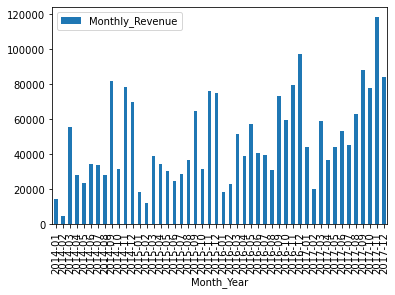

In [34]:
#plotting graph

mr = sheet.plot.bar(x = 'Month_Year', y = 'Monthly_Revenue')
plt.show()

In [35]:
#calculating Average, maximum and minimumm Monthly Revenue 

mean1 = sheet['Monthly_Revenue'].mean()
max1 = sheet['Monthly_Revenue'].max()
min1 = sheet['Monthly_Revenue'].min()

print('Average Monthly Revenue: ' + str(mean1))
print('Maximum Monthly Revenue: ' + str(max1))
print('Minimum Monthly Revenue: ' + str(min1))

Average Monthly Revenue: 47858.351256250004
Maximum Monthly Revenue: 118447.82500000003
Minimum Monthly Revenue: 4519.892


In [36]:
#creating a column with a year field only give a suitable name to it
sheet1['Year'] = pd.to_datetime(sheet1['Order Date']).dt.to_period('Y')
sheet1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month_Year,Year
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,2016-11,2016
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820,2016-11,2016
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,2016-06,2016
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015-10,2015
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,2015-10,2015


In [37]:
#Calculating yearly revenue

new_sheet2 = sheet1[['Year']].copy()
new_sheet2['Yearly_Revenue'] = sheet1['Sales']
new_sheet2 = new_sheet2.groupby(['Year'], as_index = False).agg('sum')
print(new_sheet2)

   Year  Yearly_Revenue
0  2014     484247.4981
1  2015     470532.5090
2  2016     609205.5980
3  2017     733215.2552


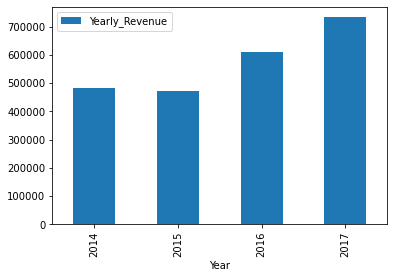

In [38]:
#plotting graph of yearly revenue

yr = new_sheet2.plot.bar(x = 'Year', y = 'Yearly_Revenue')
plt.show()

In [39]:
#Calculating average, maximum, minimum yearly revenue

mean1 = new_sheet2['Yearly_Revenue'].mean()
max1 = new_sheet2['Yearly_Revenue'].max()
min1 = new_sheet2['Yearly_Revenue'].min()

print('Average Yearly Revenue: ' + str(mean1))
print('Maximum Yearly Revenue: ' + str(max1))
print('Minimum Yearly Revenue: ' + str(min1))

Average Yearly Revenue: 574300.2150750004
Maximum Yearly Revenue: 733215.2551999999
Minimum Yearly Revenue: 470532.50899999985


In [40]:
#Finding out the monthly growth rate 
#6.1: Create a column in the monthly revenue dataset for monthly growth rate

sheet['Monthly_Growth'] = sheet['Monthly_Revenue'].pct_change() * 100
print(sheet)

   Month_Year  Monthly_Revenue  Monthly_Growth
0     2014-01       14236.8950             NaN
1     2014-02        4519.8920      -68.252263
2     2014-03       55691.0090     1132.131409
3     2014-04       28295.3450      -49.192257
4     2014-05       23648.2870      -16.423401
5     2014-06       34595.1276       46.290205
6     2014-07       33946.3930       -1.875220
7     2014-08       27909.4685      -17.783699
8     2014-09       81777.3508      193.009345
9     2014-10       31453.3930      -61.537770
10    2014-11       78628.7167      149.984848
11    2014-12       69545.6205      -11.551882
12    2015-01       18174.0756      -73.867405
13    2015-02       11951.4110      -34.239236
14    2015-03       38726.2520      224.030794
15    2015-04       34195.2085      -11.700186
16    2015-05       30131.6865      -11.883308
17    2015-06       24797.2920      -17.703604
18    2015-07       28765.3250       16.001880
19    2015-08       36898.3322       28.273650
20    2015-09

In [41]:
#Finding out maximum monthly growth rate
max_monthly_rate = sheet['Monthly_Growth'].max()
print(max_monthly_rate, "%")

1132.13140933456 %


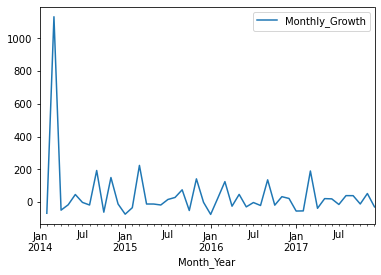

In [42]:
#6.3: plotting the graph

mg = sheet.plot.line(x = 'Month_Year', y ='Monthly_Growth')
plt.show()

In [43]:
# Finding out Maximum and Minimum Product sold
sales_sheet = sheet1[['Product ID', 'Quantity']].copy()
sales_sheet = sales_sheet.groupby(['Product ID'], as_index = False).agg('sum')
print(sales_sheet)

           Product ID  Quantity
0     FUR-BO-10000112       9.0
1     FUR-BO-10000330      10.0
2     FUR-BO-10000362      14.0
3     FUR-BO-10000468      21.0
4     FUR-BO-10000711      12.0
...               ...       ...
1857  TEC-PH-10004912      11.0
1858  TEC-PH-10004922      19.0
1859  TEC-PH-10004924       8.0
1860  TEC-PH-10004959       4.0
1861  TEC-PH-10004977      32.0

[1862 rows x 2 columns]


In [44]:
most_sold_product = sales_sheet[sales_sheet['Quantity'] == sales_sheet['Quantity'].max()]
print(most_sold_product)

           Product ID  Quantity
1569  TEC-AC-10003832      75.0
